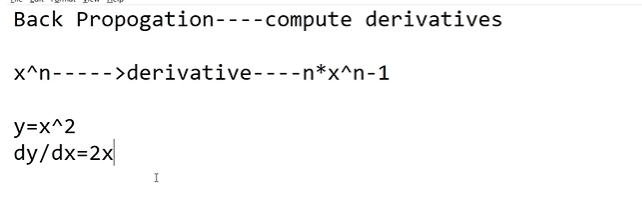

What is a Derivative?
Imagine you’re riding a bike on a hilly road.

The derivative tells you how steep the hill is at any point.
If the road goes up (positive slope), the derivative is positive, meaning you're climbing.
If the road goes down (negative slope), the derivative is negative, meaning you're going downhill.
If the road is flat, the derivative is zero, meaning there's no slope.

```
# This is formatted as code
```



Why Are Derivatives Important?
In machine learning, we use derivatives to:

Find out how much a small change in an input (like weights of a model) will affect the output (like predictions).
Optimize models by making adjustments to minimize errors (using techniques like gradient descent).

```
# This is formatted as code
```



In [30]:
import torch

In [31]:
# Create a tensor with requires_grad=True
x = torch.tensor(4.0, requires_grad=True)
x

tensor(4., requires_grad=True)

In [32]:
# Define a function y = x^2
y = x ** 2
y

tensor(16., grad_fn=<PowBackward0>)

In [33]:
# Back propagation
'''
If we try to do back propagation(computing derivative) on input matrix 'X' which is linked to function 'Y'.
Derivative computed will be stored in 'X.grad' and its value will be 2x

Explanation:

The function
𝑦 = 𝑥^2
 .
The derivative
𝑑𝑦/𝑑𝑥 = 2𝑥

At 𝑥=4

𝑑𝑦/𝑑𝑥 = 8
'''
y.backward() # it computes gradient of current tensor(i.e x) 2 times x i.e 8
print(x.grad)

tensor(8.)


# Lets se more complex tensor example, tensor having multi dimensional array instead of single value

**Prior to it, let's understand chain rule of differentiation**

The chain rule helps you find the derivative of a "function inside another function." It tells you how changes in one variable affect another through a series of steps.

Imagine you’re following a recipe:

You cut apples.

Then, you make apple juice from the slices.

Finally, you use the juice to make jelly.

The chain rule helps figure out how changes in the apples (input) affect the

final jelly (output) by looking at all the steps in between.
```
# This is formatted as code
```


**Mathematical Example**

Let’s say we have a function:

𝑧=𝑓(𝑦),

𝑦=𝑔(𝑥)

So:

𝑧=𝑓(𝑔(𝑥))

The chain rule says:

𝑑𝑧/𝑑𝑥 = 𝑑𝑓/𝑑𝑦 ⋅ 𝑑𝑔/𝑑𝑥

If we want to calculate the derivative of Z w.r.t X then it will be the dot product of derivative of Z w.r.t  Y multiplied by derivative of Y w.r.t  X

That is, We take the derivative of
𝑓
with respect to
𝑦
and multiply it by the derivative of
𝑔
with respect to
𝑥.

**Real-World Example**

Suppose you earn money based on how many cakes you sell.

𝑥
: The number of cakes you bake.


𝑦
=
𝑔
(
𝑥
)
: The money you make from cakes.


𝑧
=
𝑓
(
𝑦
)
: Your happiness from earning money.


The chain rule tells you how the number of cakes (
𝑥
) affects your happiness (
𝑧
) by combining:

How much money you earn for each cake (
𝑑
𝑔/
𝑑
𝑥
 ).


How your happiness changes with money (
𝑑
𝑓/
𝑑
𝑦
 ).

```
# This is formatted as code
```



**How Does This Relate to PyTorch and Machine Learning?**

In machine learning, you often have layers of functions in a neural network.

Input data passes through layer 1.

Its output becomes the input to layer 2, and so on, until the final output is calculated.

When we calculate the loss (error) and backpropagate to update weights, we need to compute how each layer's parameters contribute to the final loss. This is where the chain rule is used.


In [38]:
lst =[[2.,3.,1.],[4.,5.,3.],[7.,6.,4.]] # nested list
torch_input = torch.tensor(lst, requires_grad=True) # it becomes 2D array
torch_input

tensor([[2., 3., 1.],
        [4., 5., 3.],
        [7., 6., 4.]], requires_grad=True)

**Ideally a input is taken, weight is multiplied, bias is added. Then on top of it sigmoid function is added. And based on chain rule, we also have to do back propagation w.r.t too all of the operation.**

In [52]:
# Lets suppose one such operation
y = torch_input**3 + torch_input**2   # actually it is function y = x**3+x**2
z = y*2                               # z=y*2

'''
Step-by-Step Gradient Calculation

For each element
𝑥 i.e for all the 9 elements present inside the tensor_input:

1. Compute 𝑦=𝑥^3 + 𝑥^2
2. Compute 𝑧=2𝑦
3. Derivative of 𝑧 with respect to 𝑥:
𝑑𝑧/𝑑𝑥 = 𝑑z/𝑑y . 𝑑y/𝑑x
      = 2 . (3𝑥^2 + 2𝑥)

Example Calculation for 𝑥=2:

𝑦 = 2^3+2^2 = 8+4 = 12

𝑧 = 2 ⋅ 12 = 24

Gradient:
𝑑𝑧/𝑑𝑥 = 2⋅ (3(2^2)+2(2)) = 2 ⋅ ( 12 + 4 ) = 32

We can find the gradient in pytorch using backward() function, coded below.
'''

In [54]:
print(torch_input)
print(y)
print(z)

tensor([[2., 3., 1.],
        [4., 5., 3.],
        [7., 6., 4.]], requires_grad=True)
tensor([[ 12.,  36.,   2.],
        [ 80., 150.,  36.],
        [392., 252.,  80.]], grad_fn=<AddBackward0>)
tensor([[ 24.,  72.,   4.],
        [160., 300.,  72.],
        [784., 504., 160.]], grad_fn=<MulBackward0>)


In [55]:
# Sum z to calculate gradients
z_sum = z.sum()
z_sum.backward()  # computing 𝑑𝑧/𝑑𝑥

# Print gradients of input
print("Gradients of input:")
print(torch_input.grad) # so you can see for row 0th column 0th index i.e value = 2, our output matrix holds 32

Gradients of input:
tensor([[ 32.,  66.,  10.],
        [112., 170.,  66.],
        [322., 240., 112.]])


**why summing up z matrix and applying backward() on top of it.why cant just z.backward() ???**

**Why Use z.sum()?**

In PyTorch, the .backward() method computes the gradients of a scalar (a single value) with respect to the tensor's elements.

If z is not a scalar (e.g., it’s a tensor with multiple elements), PyTorch won’t know how to calculate gradients because gradients are conceptually defined for a single loss or scalar output.

**Key Points:**

Scalar Requirement for Backward:

Gradients represent the rate of change of a **single output** (e.g., loss) with **respect to inputs**. When you call .backward(), PyTorch expects the output to be a scalar.

If z is a multi-element tensor, PyTorch will raise an error.

**Summing to a Scalar:**

When we use z.sum(), we combine all elements of z into a single scalar. This makes it possible for PyTorch to calculate gradients for each input element with respect to this scalar output.

**What Happens with z.backward()?**

If z is a tensor (not a scalar), calling z.backward() directly will throw an error

RuntimeError: grad can be implicitly created only for scalar outputs

**Conclusion:**

Use z.sum().backward() when you want to compute gradients for all inputs with respect to the sum of all outputs in z.